In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
# modify "customized_path_to_homework", path of folder in drive, where you uploaded your homework
customized_path_to_homework = "/content/drive/My Drive/research data_actual"
sys.path.append(customized_path_to_homework)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import linear_model
from scipy.stats import spearmanr
import numpy as np
from sklearn.linear_model import LinearRegression

from scipy.stats import linregress

In [4]:
original = pd.read_excel("/content/drive/My Drive/research data_actual/Original.xlsx")
origin = pd.read_excel("/content/drive/My Drive/research data_actual/Project4_Origin.xlsx")
piazza = pd.read_excel("/content/drive/My Drive/research data_actual/Piazza contribution.xlsx")



In [5]:
origin

,Course,User,Email,view,online,posts,answers,NumVisit,Last Name,First Name,...,Time,Correctness by thirdsubmission,Penalty/Bonus,Grade,TG,Total Score,distribution,Timestamp,Correctness/Testing Score,Correctness/Testing %
0,CS 2114,andrewc0,andrewc0@vt.edu,37.0,130.0,0.0,0.0,0.0,Choi,Andrew,...,2021-04-10,0.000000,-10.0,25.000000,35.000000,0.000000,3.0,1.620000e+12,0.000000,0.000000
1,CS 2114,jeremybruce,jeremybruce@vt.edu,0.0,43.0,0.0,0.0,4.0,Bruce,Jeremy Daniel,...,2021-04-09,0.000000,-20.0,25.000000,45.000000,0.000000,3.0,1.620000e+12,0.000000,0.000000
2,CS 2114,zehua,zehua@vt.edu,67.0,27.0,0.0,0.0,0.0,Zhang,Zehua,...,2021-04-09,0.772174,-5.0,25.000000,30.000000,0.000000,3.0,1.620000e+12,0.000000,0.000000
3,CS 2114,nicholasmcho,nicholasmcho@vt.edu,67.0,63.0,0.0,0.0,0.0,Cho,Nicholas Matthew,...,2021-04-09,0.000000,-35.0,26.840504,61.840504,0.000000,3.0,1.620000e+12,0.000000,0.000000
4,CS 2114,benmathews,benmathews@vt.edu,0.0,17.0,0.0,0.0,0.0,Mathews,Ben Bruce,...,2021-04-07,0.000000,-15.0,27.045861,42.045861,0.000000,3.0,1.620000e+12,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,CS 2114,sofiak,sofiak@vt.edu,21.0,37.0,0.0,0.0,0.0,Kazmierczak,Sofia Laine,...,2021-04-08,0.838286,0.0,100.000000,100.000000,30.271337,10.0,1.620000e+12,30.271337,0.864895
485,CS 2114,sslater2024,sslater2024@vt.edu,115.0,137.0,0.0,1.0,8.0,Slater,Sierra Noel,...,2021-04-07,0.000000,0.0,100.000000,100.000000,0.000000,10.0,1.620000e+12,0.000000,0.000000
486,CS 2114,thriloks,thriloks@vt.edu,0.0,38.0,0.0,0.0,0.0,Shivaraman,Thrilok,...,2021-04-08,0.978261,0.0,100.000000,100.000000,29.813566,10.0,1.620000e+12,29.813566,0.851816
487,CS 2114,timlichen,timlichen@vt.edu,62.0,154.0,0.0,0.0,5.0,Chen,Tim Li,...,2021-04-06,0.902427,0.0,100.000000,100.000000,0.000000,10.0,1.620000e+12,0.000000,0.000000


In [6]:
from openpyxl import load_workbook
wb = load_workbook("/content/drive/My Drive/research data_actual/Original.xlsx")
ws = wb.active

In [7]:
less_85 = original[original['TG'] < 80]
above_85 = original[original['TG'] >= 80]

less_85_2 = origin[origin['TG'] < 80]
above_85_2 = origin[origin['TG'] >= 80]

In [8]:
# spearman correlation
coef,p = spearmanr(less_85_2.view,less_85_2.TG)
print('Spearmans correlation coefficient overall help-seeking activity vs grade: %.3f' % coef)

Spearmans correlation coefficient overall help-seeking activity vs grade: 0.145


In [9]:
above_85_2.NumVisit.mean()

3.4575342465753423

In [10]:
linregress(less_85_2.view, less_85_2.TG)

LinregressResult(slope=0.04152640717868057, intercept=66.19053314467745, rvalue=0.061635176978811775, pvalue=0.4964815491520048, stderr=0.06088205525263493)

In [11]:
# spearman correlation
coef,p = spearmanr(above_85_2.view,above_85_2.TG)
print('Spearmans correlation coefficient overall help-seeking activity vs grade: %.3f' % coef)

Spearmans correlation coefficient overall help-seeking activity vs grade: 0.160


In [12]:
linregress(above_85_2.view, above_85_2.TG)

LinregressResult(slope=0.030412689305045176, intercept=93.38562168264683, rvalue=0.14732737904859144, pvalue=0.004795824742072947, stderr=0.010716498010434138)

In [13]:
less_85_2

,Course,User,Email,view,online,posts,answers,NumVisit,Last Name,First Name,...,Time,Correctness by thirdsubmission,Penalty/Bonus,Grade,TG,Total Score,distribution,Timestamp,Correctness/Testing Score,Correctness/Testing %
0,CS 2114,andrewc0,andrewc0@vt.edu,37.0,130.0,0.0,0.0,0.0,Choi,Andrew,...,2021-04-10,0.000000,-10.0,25.000000,35.000000,0.000000,3.0,1.620000e+12,0.000000,0.000000
1,CS 2114,jeremybruce,jeremybruce@vt.edu,0.0,43.0,0.0,0.0,4.0,Bruce,Jeremy Daniel,...,2021-04-09,0.000000,-20.0,25.000000,45.000000,0.000000,3.0,1.620000e+12,0.000000,0.000000
2,CS 2114,zehua,zehua@vt.edu,67.0,27.0,0.0,0.0,0.0,Zhang,Zehua,...,2021-04-09,0.772174,-5.0,25.000000,30.000000,0.000000,3.0,1.620000e+12,0.000000,0.000000
3,CS 2114,nicholasmcho,nicholasmcho@vt.edu,67.0,63.0,0.0,0.0,0.0,Cho,Nicholas Matthew,...,2021-04-09,0.000000,-35.0,26.840504,61.840504,0.000000,3.0,1.620000e+12,0.000000,0.000000
4,CS 2114,benmathews,benmathews@vt.edu,0.0,17.0,0.0,0.0,0.0,Mathews,Ben Bruce,...,2021-04-07,0.000000,-15.0,27.045861,42.045861,0.000000,3.0,1.620000e+12,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,CS 2114,lilykhoch,lilykhoch@vt.edu,37.0,64.0,0.0,0.0,0.0,Khochareun,Lily Ling,...,2021-04-08,0.722408,0.0,79.616643,79.616643,25.284281,8.0,1.620000e+12,25.284281,0.722408
197,CS 2114,adjeirenn,adjeirenn@vt.edu,42.0,117.0,0.0,0.0,0.0,Adjei,Renny Afriyie-Antwi,...,2021-04-08,0.503902,0.0,79.618841,79.618841,17.549407,8.0,1.620000e+12,17.549407,0.501412
198,CS 2114,chagerup24,chagerup24@vt.edu,18.0,40.0,0.0,0.0,0.0,Hagerup,Colin Edward,...,2021-04-07,0.000000,0.0,79.653311,79.653311,0.000000,8.0,1.620000e+12,0.000000,0.000000
199,CS 2114,jay1890,jay1890@vt.edu,0.0,0.0,0.0,0.0,0.0,Kapoor,Jay Ashok,...,2021-04-08,0.302160,0.0,79.944964,79.944964,0.000000,8.0,1.620000e+12,0.000000,0.000000


In [14]:
filterAbove85 = above_85
# [(above_85["NumVisit"] > 0) & (above_85["Max Sub"] > 7) &((above_85["Correctness by thirdsubmission"] < 0.7))]
# filterLess85 = less_85[(less_85["Max Sub"] > 7) & (less_85["NumberOfDays"] > 3)]
filterLess85 = less_85
# [(less_85["Max Sub"] > 7) ]

filteredAbove85_Numvisit = above_85_2[above_85_2["NumVisit"] == 0]
filterAbove85_2 = above_85_2[(above_85_2["NumVisit"] > 0) & (above_85_2["Max Sub"] > 7) & (above_85_2["Correctness by thirdsubmission"] < 0.5)]
filterLess85_2 = less_85_2
# [(less_85_2["Max Sub"] > 7)]


In [15]:
filterNonVisit = filteredAbove85_Numvisit[(filteredAbove85_Numvisit["Max Sub"] > 7) & (filteredAbove85_Numvisit["Correctness by thirdsubmission"] < 0.5) & (filteredAbove85_Numvisit["NumberOfDays"] > 4)]


In [16]:
filtered = pd.concat([filterAbove85, filterLess85])
filtered2 = pd.concat([filterAbove85_2, filterLess85_2, filterNonVisit])


In [73]:
filterAbove85_temp = above_85_2[(above_85_2["Max Sub"] > 10) & (above_85_2["Correctness by thirdsubmission"] < 0.5)]
filterLess85_temp = less_85_2
filtered_temp = pd.concat([filterAbove85_temp, filterLess85_temp])

In [74]:
# spearman correlation
coef,p = spearmanr(filtered_temp.NumVisit,filtered_temp.TG)
print('Spearmans correlation coefficient overall help-seeking activity vs grade: %.3f' % coef)

Spearmans correlation coefficient overall help-seeking activity vs grade: 0.313


In [75]:
# spearman correlation
coef,p = spearmanr(filtered.NumVisit,filtered.TG)
print('Spearmans correlation coefficient overall help-seeking activity vs grade: %.3f' % coef)

Spearmans correlation coefficient overall help-seeking activity vs grade: 0.189


In [76]:
# spearman correlation
coef,p = spearmanr(filtered2.NumVisit,filtered2.TG)
print('Spearmans correlation coefficient overall help-seeking activity vs grade: %.3f' % coef)

Spearmans correlation coefficient overall help-seeking activity vs grade: 0.507


In [77]:
# spearman correlation
coef,p = spearmanr(filtered2.online,filtered2.TG)
print('Spearmans correlation coefficient overall help-seeking activity vs grade: %.3f' % coef)

Spearmans correlation coefficient overall help-seeking activity vs grade: 0.291


In [78]:
# spearman correlation
coef,p = spearmanr(filtered2.posts,filtered2.TG)
print('Spearmans correlation coefficient overall help-seeking activity vs grade: %.3f' % coef)

Spearmans correlation coefficient overall help-seeking activity vs grade: 0.249


In [23]:
# spearman correlation
coef,p = spearmanr(filtered2.answers,filtered2.TG)
print('Spearmans correlation coefficient overall help-seeking activity vs grade: %.3f' % coef)

Spearmans correlation coefficient overall help-seeking activity vs grade: 0.189


In [24]:
# spearman correlation
coef,p = spearmanr(piazza.answers,piazza.TG)
print('Spearmans correlation coefficient overall help-seeking activity vs grade: %.3f' % coef)

Spearmans correlation coefficient overall help-seeking activity vs grade: 0.159


In [25]:
# spearman correlation
coef,p = spearmanr(piazza.posts,piazza.TG)
print('Spearmans correlation coefficient overall help-seeking activity vs grade: %.3f' % coef)

Spearmans correlation coefficient overall help-seeking activity vs grade: 0.157


In [26]:

filteredAbove85_Numvisit_3 = above_85_2[ (above_85_2["posts"] == 0)]
filterAbove85_3 = above_85_2[(above_85_2["posts"] >0) & (above_85_2["Max Sub"] > 7) & (above_85_2["Correctness by thirdsubmission"] < 0.5)]
filterLess85_3 = less_85_2
# [(less_85_2["Max Sub"] > 7)]
filterNonVisit3 = filteredAbove85_Numvisit_3[(filteredAbove85_Numvisit_3["Max Sub"] > 7) & (filteredAbove85_Numvisit_3["Correctness by thirdsubmission"] < 0.5) & (filteredAbove85_Numvisit_3["NumberOfDays"] > 4)]
filterNonVisit3

,Course,User,Email,view,online,posts,answers,NumVisit,Last Name,First Name,...,Time,Correctness by thirdsubmission,Penalty/Bonus,Grade,TG,Total Score,distribution,Timestamp,Correctness/Testing Score,Correctness/Testing %
81,CS 2114,yunqin,yunqin@vt.edu,0.0,90.0,0.0,0.0,82.0,Yang,Yun Qin,...,2021-04-08,0.238543,-25.0,63.853261,88.853261,0.0,6.0,1.620000e+12,0.0,0.0
83,CS 2114,kshingala,kshingala@vt.edu,23.0,54.0,0.0,0.0,0.0,Shingala,Kavin Hiren,...,2021-04-07,0.000000,-20.0,64.239130,84.239130,4.0,6.0,1.620000e+12,0.0,0.0
85,CS 2114,ahanumai,ahanumai@vt.edu,16.0,71.0,0.0,0.0,46.0,Hanumaiah,Adi Srini,...,2021-04-05,0.000000,-35.0,65.000000,100.000000,0.0,7.0,1.620000e+12,0.0,0.0
102,CS 2114,bmeghna,bmeghna@vt.edu,30.0,60.0,0.0,0.0,7.0,Banerjee,Meghna,...,2021-04-06,0.000000,-30.0,68.260870,98.260870,0.0,7.0,1.620000e+12,0.0,0.0
117,CS 2114,rowanc,rowanc@vt.edu,102.0,93.0,0.0,0.0,29.0,Cusano,Rowan Christopher,...,2021-04-08,0.000000,-30.0,70.000000,100.000000,0.0,7.0,1.620000e+12,0.0,0.0
143,CS 2114,simrank20,simrank20@vt.edu,32.0,218.0,0.0,0.0,0.0,Kumari,Simran,...,2021-04-04,0.000000,-15.0,73.847692,88.847692,7.0,7.0,1.620000e+12,0.0,0.0
169,CS 2114,jstonebraker,jstonebraker@vt.edu,11.0,102.0,0.0,0.0,0.0,Stonebraker,Jonathan David,...,2021-04-05,0.000000,-15.0,76.686606,91.686606,0.0,8.0,1.620000e+12,0.0,0.0
299,CS 2114,pmihir,pmihir@vt.edu,0.0,15.0,0.0,0.0,7.0,Patel,Mihir Rajen,...,2021-04-01,0.000000,0.0,90.664282,90.664282,0.0,9.0,1.620000e+12,0.0,0.0
309,CS 2114,hurayrah,hurayrah@vt.edu,3.0,41.0,0.0,0.0,12.0,Malik,Hurayrah,...,2021-03-31,0.000000,0.0,91.778897,91.778897,15.0,9.0,1.620000e+12,0.0,0.0
331,CS 2114,moonk19,moonk19@vt.edu,1.0,14.0,0.0,0.0,24.0,Moon,Kyoung Nam,...,2021-04-05,0.000000,0.0,93.478261,93.478261,0.0,9.0,1.620000e+12,0.0,0.0


In [27]:

filtered3 = pd.concat([filterAbove85_3, filterLess85_3, filterNonVisit3])

In [28]:
# spearman correlation
coef,p = spearmanr(filtered3.posts,filtered3.TG)
print('Spearmans correlation coefficient overall help-seeking activity vs grade: %.3f' % coef)

Spearmans correlation coefficient overall help-seeking activity vs grade: 0.487


In [29]:
# spearman correlation
coef,p = spearmanr(origin.posts,origin.TG)
print('Spearmans correlation coefficient overall help-seeking activity vs grade: %.3f' % coef)

Spearmans correlation coefficient overall help-seeking activity vs grade: 0.152


In [30]:
# spearman correlation
coef,p = spearmanr(origin.NumVisit,origin.TG)
print('Spearmans correlation coefficient overall help-seeking activity vs grade: %.3f' % coef)

Spearmans correlation coefficient overall help-seeking activity vs grade: 0.079


In [31]:
# spearman correlation
coef,p = spearmanr(filtered2.NumVisit,filtered2.TG)
print('Spearmans correlation coefficient overall help-seeking activity vs grade: %.3f' % coef)

Spearmans correlation coefficient overall help-seeking activity vs grade: 0.507


Text(0, 0.5, 'Final Grade of Project 4')

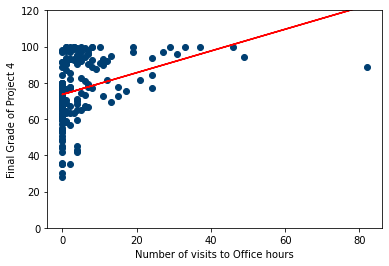

In [32]:
ox = filtered2.NumVisit
oy = filtered2.TG
plt.scatter(ox,oy,color='#003F72')
m, b = np.polyfit(ox, oy, 1)
plt.ylim(0,120)
plt.plot(ox, m*ox+b, color = 'red')
plt.xlabel("Number of visits to Office hours")
plt.ylabel("Final Grade of Project 4")

In [33]:
#struggle
filteredAbove85_Numvisit_4 = above_85_2[(above_85_2['NumVisit'] == 0) & (above_85_2['online'] == 0)]

filterAbove85_4 = above_85_2[(above_85_2['NumVisit'] > 0)& (above_85_2['online'] > 0) & (above_85_2["Max Sub"] > 9) & (above_85_2["Correctness by thirdsubmission"] <= 0.5)]
filterLess85_4 = less_85_2
filterNonVisit4 = filteredAbove85_Numvisit_4[(filteredAbove85_Numvisit_4["Max Sub"] > 9) & (filteredAbove85_Numvisit_4["Correctness by thirdsubmission"] <= 0.5) & (filteredAbove85_Numvisit_4["NumberOfDays"] > 3)]
filtered4 = pd.concat([filterAbove85_4, filterLess85_4, filterNonVisit4])

#non struggle
nonfilterAbove85_4 =  above_85_2[(above_85_2['NumVisit'] > 0)& (above_85_2['online'] > 0) & (above_85_2["Max Sub"] <= 9) & (above_85_2["Correctness by thirdsubmission"] > 0.5)]
nonfilterNonVisit4 = filteredAbove85_Numvisit_4[(filteredAbove85_Numvisit_4["Max Sub"] <= 9) & (filteredAbove85_Numvisit_4["Correctness by thirdsubmission"] > 0.5) & (filteredAbove85_Numvisit_4["NumberOfDays"] <= 3)]
nonfiltered4 = pd.concat([nonfilterAbove85_4, nonfilterNonVisit4])

#struggle temp
filterAbove85_t = above_85_2[(above_85_2["Max Sub"] > 10) & (above_85_2["Correctness by thirdsubmission"] <= 0.5)]
filterLess85_t = less_85_2
filtered5 = pd.concat([filterAbove85_t, filterLess85_t])

In [34]:
filtered5.count

<bound method DataFrame.count of       Course        User              Email  view  online  posts  answers  \
46   CS 2114       ramya       ramya@vt.edu   3.0    50.0    0.0      0.0   
62   CS 2114       shans       shans@vt.edu  18.0    23.0    0.0      0.0   
66   CS 2114   zharmeyer   zharmeyer@vt.edu  20.0    35.0    7.0      1.0   
81   CS 2114      yunqin      yunqin@vt.edu   0.0    90.0    0.0      0.0   
83   CS 2114   kshingala   kshingala@vt.edu  23.0    54.0    0.0      0.0   
..       ...         ...                ...   ...     ...    ...      ...   
196  CS 2114   lilykhoch   lilykhoch@vt.edu  37.0    64.0    0.0      0.0   
197  CS 2114   adjeirenn   adjeirenn@vt.edu  42.0   117.0    0.0      0.0   
198  CS 2114  chagerup24  chagerup24@vt.edu  18.0    40.0    0.0      0.0   
199  CS 2114     jay1890     jay1890@vt.edu   0.0     0.0    0.0      0.0   
201  CS 2114    atfuerst    atfuerst@vt.edu   0.0     8.0    0.0      0.0   

     NumVisit   Last Name           First 

In [35]:
# spearman correlation
coef,p = spearmanr(filtered5.view,filtered5.TG)
print('Spearmans correlation coefficient overall help-seeking activity vs grade: %.3f' % coef)
linregress(filtered5.view, filtered5.TG)

Spearmans correlation coefficient overall help-seeking activity vs grade: 0.412


LinregressResult(slope=0.21934367901892604, intercept=73.94645623695382, rvalue=0.35800252996126647, pvalue=7.73143232007777e-08, stderr=0.03938353979477774)

In [36]:
# spearman correlation
coef,p = spearmanr(filterLess85_4.view,filterLess85_4.TG)
print('Spearmans correlation coefficient overall help-seeking activity vs grade: %.3f' % coef)

Spearmans correlation coefficient overall help-seeking activity vs grade: 0.145


In [37]:

linregress(filterLess85_4.view, filterLess85_4.TG)

LinregressResult(slope=0.04152640717868057, intercept=66.19053314467745, rvalue=0.061635176978811775, pvalue=0.4964815491520048, stderr=0.06088205525263493)

In [38]:
# spearman correlation
coef,p = spearmanr(filterLess85_4.NumVisit,filterLess85_4.TG)
print('Spearmans correlation coefficient overall help-seeking activity vs grade: %.3f' % coef)

Spearmans correlation coefficient overall help-seeking activity vs grade: -0.005


In [39]:
linregress(filterLess85_4.NumVisit, filterLess85_4.TG)

LinregressResult(slope=0.42383606539400503, intercept=65.9069024507907, rvalue=0.13456677986190244, pvalue=0.1362025843257549, stderr=0.28256082275498196)

In [40]:
# spearman correlation
coef,p = spearmanr(filtered4.view,filtered4.TG)
print('Spearmans correlation coefficient overall help-seeking activity vs grade: %.3f' % coef)
print(p)

Spearmans correlation coefficient overall help-seeking activity vs grade: 0.388
6.992090233635509e-08


In [43]:
from scipy.stats import linregress
linregress(filtered4_remove.view, filtered4_remove.TG)

LinregressResult(slope=0.22947035811354208, intercept=71.37821001510336, rvalue=0.3604900772268647, pvalue=6.662531770409965e-07, stderr=0.04450354536788881)

In [44]:
# spearman correlation
coef,p = spearmanr(origin.view,origin.TG)
print('Spearmans correlation coefficient overall help-seeking activity vs grade: %.3f' % coef)
print(p)

Spearmans correlation coefficient overall help-seeking activity vs grade: 0.285
1.4503247445084095e-10


In [45]:
linregress(origin.view, origin.TG)

LinregressResult(slope=0.12221575284095498, intercept=84.80505637468426, rvalue=0.21717685155232952, pvalue=1.245868635884644e-06, stderr=0.024891888434532626)

In [46]:
# spearman correlation
coef,p = spearmanr(filtered4_remove.NumVisit,filtered4_remove.TG)
print('Spearmans correlation coefficient overall help-seeking activity vs grade: %.3f' % coef)
print(p)

Spearmans correlation coefficient overall help-seeking activity vs grade: 0.539
5.789283621384471e-15


In [47]:
linregress(filtered4_remove.NumVisit, filtered4_remove.TG)

LinregressResult(slope=0.8663015037367479, intercept=71.43490687851678, rvalue=0.4302922343570444, pvalue=1.652569146535916e-09, stderr=0.13621784922535463)

In [48]:
# spearman correlation
coef,p = spearmanr(origin.NumVisit,origin.TG)
print('Spearmans correlation coefficient overall help-seeking activity vs grade: %.3f' % coef)
print(p)

Spearmans correlation coefficient overall help-seeking activity vs grade: 0.079
0.08108967563452127


In [49]:
linregress(origin.NumVisit,origin.TG)

LinregressResult(slope=0.22490906949856634, intercept=86.41006014567915, rvalue=0.11666986052989671, pvalue=0.009817786087657938, stderr=0.08675764029142165)

-13.89557026156583

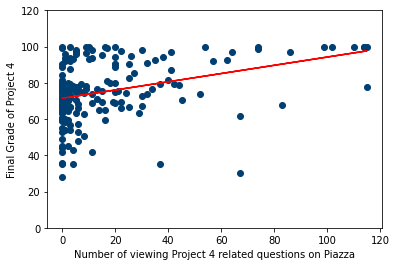

In [50]:
ox = filtered4.view
oy = filtered4.TG
plt.scatter(ox,oy,color='#003F72')
m, b = np.polyfit(ox, oy, 1)
plt.ylim(0,120)
plt.plot(ox, m*ox+b, color = 'red')
plt.xlabel("Number of viewing Project 4 related questions on Piazza")
plt.ylabel("Final Grade of Project 4")
rsquare = r2_score(oy,ox)
rsquare

In [51]:
filtered4_remove = filtered4[(filtered4["NumVisit"] < 55) ]
filtered4_remove

,Course,User,Email,view,online,posts,answers,NumVisit,Last Name,First Name,...,Time,Correctness by thirdsubmission,Penalty/Bonus,Grade,TG,Total Score,distribution,Timestamp,Correctness/Testing Score,Correctness/Testing %
46,CS 2114,ramya,ramya@vt.edu,3.0,50.0,0.0,0.0,9.0,Aluri,Ramya,...,2021-04-14,0.151580,-35.0,52.518857,87.518857,0.000000,5.0,1.620000e+12,0.000000,0.000000
66,CS 2114,zharmeyer,zharmeyer@vt.edu,20.0,35.0,7.0,1.0,8.0,Harmeyer,Zac Randall,...,2021-04-08,0.000000,-30.0,58.718560,88.718560,0.000000,6.0,1.620000e+12,0.000000,0.000000
84,CS 2114,jakebarder29,jakebarder29@vt.edu,0.0,13.0,0.0,0.0,24.0,Barder,Jake R Barder,...,2021-04-10,0.390635,-20.0,64.559813,84.559813,0.000000,6.0,1.620000e+12,0.000000,0.000000
85,CS 2114,ahanumai,ahanumai@vt.edu,16.0,71.0,0.0,0.0,46.0,Hanumaiah,Adi Srini,...,2021-04-05,0.000000,-35.0,65.000000,100.000000,0.000000,7.0,1.620000e+12,0.000000,0.000000
92,CS 2114,amounika,amounika@vt.edu,1.0,85.0,0.0,0.0,31.0,Abbineni,Mounika,...,2021-04-11,0.300505,-30.0,66.006329,96.006329,0.000000,7.0,1.620000e+12,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,CS 2114,lilykhoch,lilykhoch@vt.edu,37.0,64.0,0.0,0.0,0.0,Khochareun,Lily Ling,...,2021-04-08,0.722408,0.0,79.616643,79.616643,25.284281,8.0,1.620000e+12,25.284281,0.722408
197,CS 2114,adjeirenn,adjeirenn@vt.edu,42.0,117.0,0.0,0.0,0.0,Adjei,Renny Afriyie-Antwi,...,2021-04-08,0.503902,0.0,79.618841,79.618841,17.549407,8.0,1.620000e+12,17.549407,0.501412
198,CS 2114,chagerup24,chagerup24@vt.edu,18.0,40.0,0.0,0.0,0.0,Hagerup,Colin Edward,...,2021-04-07,0.000000,0.0,79.653311,79.653311,0.000000,8.0,1.620000e+12,0.000000,0.000000
199,CS 2114,jay1890,jay1890@vt.edu,0.0,0.0,0.0,0.0,0.0,Kapoor,Jay Ashok,...,2021-04-08,0.302160,0.0,79.944964,79.944964,0.000000,8.0,1.620000e+12,0.000000,0.000000


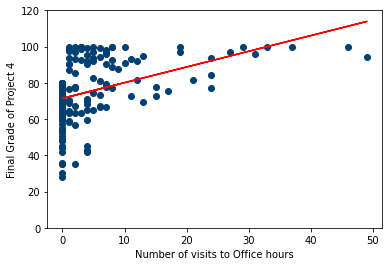

In [52]:
ox = filtered4_remove.NumVisit
oy = filtered4_remove.TG
plt.scatter(ox,oy,color='#003F72')
m, b = np.polyfit(ox, oy, 1)
plt.ylim(0,120)
plt.plot(ox, m*ox+b, color = 'red')
plt.xlabel("Number of visits to Office hours")
plt.ylabel("Final Grade of Project 4")
rsquare = r2_score(ox,oy)


-7.43148213189712

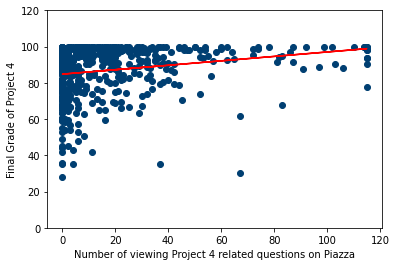

In [53]:
ox = origin.view
oy = origin.TG
plt.scatter(ox,oy,color='#003F72')
m, b = np.polyfit(ox, oy, 1)
plt.ylim(0,120)
plt.plot(ox, m*ox+b, color = 'red')
plt.xlabel("Number of viewing Project 4 related questions on Piazza")
plt.ylabel("Final Grade of Project 4")
rsquare = r2_score(ox,oy)
rsquare

-133.67355566347038

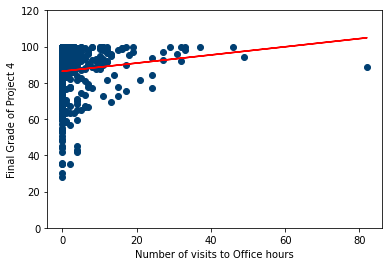

In [54]:
ox = origin.NumVisit
oy = origin.TG
plt.scatter(ox,oy,color='#003F72')
m, b = np.polyfit(ox, oy, 1)
plt.ylim(0,120)
plt.plot(ox, m*ox+b, color = 'red')
plt.xlabel("Number of visits to Office hours")
plt.ylabel("Final Grade of Project 4")
rsquare = r2_score(ox,oy)
rsquare

In [55]:
filtered4.count

<bound method DataFrame.count of       Course          User                Email  view  online  posts  answers  \
46   CS 2114         ramya         ramya@vt.edu   3.0    50.0    0.0      0.0   
66   CS 2114     zharmeyer     zharmeyer@vt.edu  20.0    35.0    7.0      1.0   
81   CS 2114        yunqin        yunqin@vt.edu   0.0    90.0    0.0      0.0   
84   CS 2114  jakebarder29  jakebarder29@vt.edu   0.0    13.0    0.0      0.0   
85   CS 2114      ahanumai      ahanumai@vt.edu  16.0    71.0    0.0      0.0   
..       ...           ...                  ...   ...     ...    ...      ...   
196  CS 2114     lilykhoch     lilykhoch@vt.edu  37.0    64.0    0.0      0.0   
197  CS 2114     adjeirenn     adjeirenn@vt.edu  42.0   117.0    0.0      0.0   
198  CS 2114    chagerup24    chagerup24@vt.edu  18.0    40.0    0.0      0.0   
199  CS 2114       jay1890       jay1890@vt.edu   0.0     0.0    0.0      0.0   
201  CS 2114      atfuerst      atfuerst@vt.edu   0.0     8.0    0.0      0.

In [56]:
nonfiltered4.count

<bound method DataFrame.count of       Course             User                   Email   view  online  posts  \
61   CS 2114    gabriellan101    gabriellan101@vt.edu   29.0    91.0    8.0   
86   CS 2114         zgates23         zgates23@vt.edu    1.0    64.0    0.0   
97   CS 2114  nicholasdinonno  nicholasdinonno@vt.edu    0.0    23.0    0.0   
148  CS 2114        amandar20        amandar20@vt.edu   12.0    86.0    0.0   
181  CS 2114         choics20         choics20@vt.edu    0.0    11.0    0.0   
185  CS 2114          lingyuz          lingyuz@vt.edu    3.0     6.0    0.0   
188  CS 2114      kavyapolina      kavyapolina@vt.edu   11.0    28.0    0.0   
194  CS 2114        marikoh20        marikoh20@vt.edu   11.0    38.0    0.0   
208  CS 2114       humanerr0r       humanerr0r@vt.edu   21.0    40.0    0.0   
216  CS 2114          habashi          habashi@vt.edu    0.0     7.0    0.0   
219  CS 2114          mpadath          mpadath@vt.edu    0.0    32.0    0.0   
229  CS 2114       

In [57]:
def GetDifferences(df1, df2):
  df = pd.concat([df1, df2]).reset_index(drop=True)
  idx = [diff[0] for diff in df.groupby(list(df.columns)).groups.values() if len(diff) == 1]
  return df.reindex(idx)

In [58]:
Maybe = GetDifferences(origin, filtered4)
filtered4

,Course,User,Email,view,online,posts,answers,NumVisit,Last Name,First Name,...,Time,Correctness by thirdsubmission,Penalty/Bonus,Grade,TG,Total Score,distribution,Timestamp,Correctness/Testing Score,Correctness/Testing %
46,CS 2114,ramya,ramya@vt.edu,3.0,50.0,0.0,0.0,9.0,Aluri,Ramya,...,2021-04-14,0.151580,-35.0,52.518857,87.518857,0.000000,5.0,1.620000e+12,0.000000,0.000000
66,CS 2114,zharmeyer,zharmeyer@vt.edu,20.0,35.0,7.0,1.0,8.0,Harmeyer,Zac Randall,...,2021-04-08,0.000000,-30.0,58.718560,88.718560,0.000000,6.0,1.620000e+12,0.000000,0.000000
81,CS 2114,yunqin,yunqin@vt.edu,0.0,90.0,0.0,0.0,82.0,Yang,Yun Qin,...,2021-04-08,0.238543,-25.0,63.853261,88.853261,0.000000,6.0,1.620000e+12,0.000000,0.000000
84,CS 2114,jakebarder29,jakebarder29@vt.edu,0.0,13.0,0.0,0.0,24.0,Barder,Jake R Barder,...,2021-04-10,0.390635,-20.0,64.559813,84.559813,0.000000,6.0,1.620000e+12,0.000000,0.000000
85,CS 2114,ahanumai,ahanumai@vt.edu,16.0,71.0,0.0,0.0,46.0,Hanumaiah,Adi Srini,...,2021-04-05,0.000000,-35.0,65.000000,100.000000,0.000000,7.0,1.620000e+12,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,CS 2114,lilykhoch,lilykhoch@vt.edu,37.0,64.0,0.0,0.0,0.0,Khochareun,Lily Ling,...,2021-04-08,0.722408,0.0,79.616643,79.616643,25.284281,8.0,1.620000e+12,25.284281,0.722408
197,CS 2114,adjeirenn,adjeirenn@vt.edu,42.0,117.0,0.0,0.0,0.0,Adjei,Renny Afriyie-Antwi,...,2021-04-08,0.503902,0.0,79.618841,79.618841,17.549407,8.0,1.620000e+12,17.549407,0.501412
198,CS 2114,chagerup24,chagerup24@vt.edu,18.0,40.0,0.0,0.0,0.0,Hagerup,Colin Edward,...,2021-04-07,0.000000,0.0,79.653311,79.653311,0.000000,8.0,1.620000e+12,0.000000,0.000000
199,CS 2114,jay1890,jay1890@vt.edu,0.0,0.0,0.0,0.0,0.0,Kapoor,Jay Ashok,...,2021-04-08,0.302160,0.0,79.944964,79.944964,0.000000,8.0,1.620000e+12,0.000000,0.000000


In [59]:
# spearman correlation
coef,p = spearmanr(Maybe.NumVisit,Maybe.TG)
print('Spearmans correlation coefficient overall help-seeking activity vs grade: %.3f' % coef)
print(p)

Spearmans correlation coefficient overall help-seeking activity vs grade: 0.007
0.9018804690576183


In [60]:
# spearman correlation
coef,p = spearmanr(Maybe.view,Maybe.TG)
print('Spearmans correlation coefficient overall help-seeking activity vs grade: %.3f' % coef)
print(p)

Spearmans correlation coefficient overall help-seeking activity vs grade: 0.142
0.012688706129239986


In [61]:
filtered4['view'].std


<bound method NDFrame._add_numeric_operations.<locals>.std of 46      3.0
66     20.0
81      0.0
84      0.0
85     16.0
       ... 
196    37.0
197    42.0
198    18.0
199     0.0
201     0.0
Name: view, Length: 181, dtype: float64>

In [62]:
Maybe['view'].std

<bound method NDFrame._add_numeric_operations.<locals>.std of 441    17.0
375    32.0
210     5.0
88      1.0
223     8.0
       ... 
351    10.0
86      1.0
332    33.0
420    15.0
236    10.0
Name: view, Length: 308, dtype: float64>

In [63]:
filtered4['online'].std

<bound method NDFrame._add_numeric_operations.<locals>.std of 46      50.0
66      35.0
81      90.0
84      13.0
85      71.0
       ...  
196     64.0
197    117.0
198     40.0
199      0.0
201      8.0
Name: online, Length: 181, dtype: float64>

In [64]:
filtered4['posts'].std

<bound method NDFrame._add_numeric_operations.<locals>.std of 46     0.0
66     7.0
81     0.0
84     0.0
85     0.0
      ... 
196    0.0
197    0.0
198    0.0
199    0.0
201    0.0
Name: posts, Length: 181, dtype: float64>

In [65]:
Maybe['online'].std

<bound method NDFrame._add_numeric_operations.<locals>.std of 441    25.0
375    90.0
210    21.0
88     12.0
223    39.0
       ... 
351     4.0
86     64.0
332    10.0
420    22.0
236     8.0
Name: online, Length: 308, dtype: float64>

In [66]:
Maybe['posts'].std

<bound method NDFrame._add_numeric_operations.<locals>.std of 441    0.0
375    0.0
210    0.0
88     0.0
223    0.0
      ... 
351    0.0
86     0.0
332    0.0
420    0.0
236    0.0
Name: posts, Length: 308, dtype: float64>

93.84090398922021

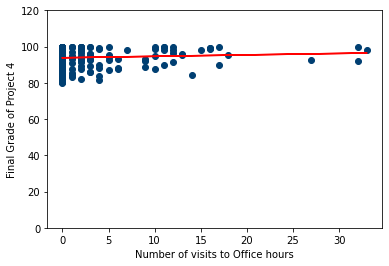

In [67]:
ox = Maybe.NumVisit
oy = Maybe.TG
plt.scatter(ox,oy,color='#003F72')
m, b = np.polyfit(ox, oy, 1)
plt.ylim(0,120)
plt.plot(ox, m*ox+b, color = 'red')
plt.xlabel("Number of visits to Office hours")
plt.ylabel("Final Grade of Project 4")
b

93.56395699851419

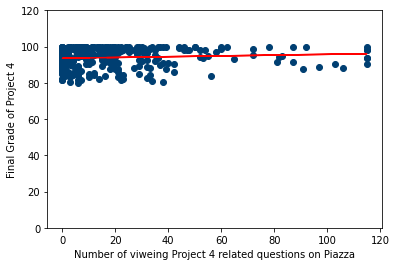

In [68]:
ox = Maybe.view
oy = Maybe.TG
plt.scatter(ox,oy,color='#003F72')
m, b = np.polyfit(ox, oy, 1)
plt.ylim(0,120)
plt.plot(ox, m*ox+b, color = 'red')
plt.xlabel("Number of viweing Project 4 related questions on Piazza")
plt.ylabel("Final Grade of Project 4")
b

In [69]:
linregress(Maybe.NumVisit, Maybe.TG)

LinregressResult(slope=0.07938959885551328, intercept=93.84090398922021, rvalue=0.0704795097607139, pvalue=0.21742082487227019, stderr=0.06423307051935145)

In [70]:
linregress(Maybe.view, Maybe.TG)

LinregressResult(slope=0.021767805235437216, intercept=93.56395699851417, rvalue=0.09739736329678299, pvalue=0.08792881423852685, stderr=0.012715603724763673)